In [2]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime 


In [3]:
# Read the dataset from the specified file path
covid_df = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv")
# Display the first few rows of the DataFrame to understand its structure
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
# Display information about the COVID-19 DataFrame
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
# Display descriptive statistics of the COVID-19 DataFrame
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [6]:
# Read the COVID-19 vaccine data for India
vac_df = pd.read_csv("/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv")
vac_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [7]:
# Drop unnecessary columns from the COVID-19 DataFrame
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace = True,axis = 1)

In [8]:
# Display the first 10 rows of the modified COVID-19 DataFrame
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [9]:
# Convert the 'Date' column in the COVID-19 DataFrame to datetime format
covid_df["Date"]= pd.to_datetime(covid_df["Date"],format = "%Y-%m-%d")

In [10]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [11]:
#Active Cases
covid_df['Active_cases']= covid_df["Confirmed"]-(covid_df["Cured"]-covid_df["Deaths"])
covid_df.tail(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095
18109,2021-08-11,West Bengal,1506532,18252,1534999,46719


In [12]:
# Create a pivot table to summarize COVID-19 data by State/UnionTerritory
statewise = pd.pivot_table(covid_df,values = ["Confirmed","Deaths","Cured"],index= "State/UnionTerritory",
                           aggfunc = "max")

In [13]:
# Calculate recovery rate and mortality rate and add them as new columns
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [14]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [15]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)

In [16]:
statewise.style.background_gradient(cmap= "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


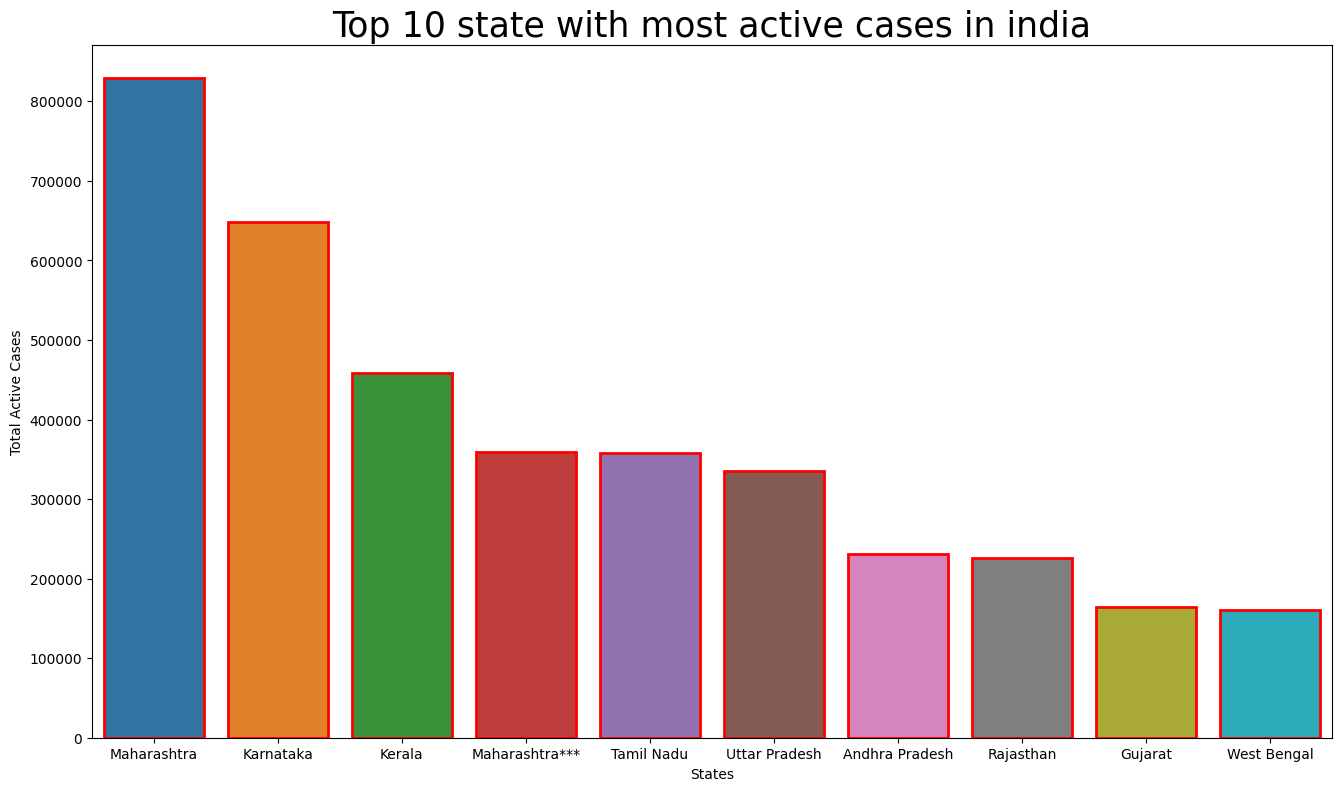

In [17]:
# Group by State/UnionTerritory, get the maximum active cases and corresponding date
top_10_active_cases = covid_df.groupby(by="State/UnionTerritory").max()[["Active_cases", "Date"]]

# Sort the DataFrame by "Active_cases" in descending order
top_10_active_cases = top_10_active_cases.sort_values(by="Active_cases", ascending=False).reset_index()

fig = plt.figure(figsize = (16,9))
plt.title("Top 10 state with most active cases in india",size = 25)
ax = sns.barplot(data = top_10_active_cases.iloc[:10],y = "Active_cases",x= "State/UnionTerritory",linewidth = 2,edgecolor = "red")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

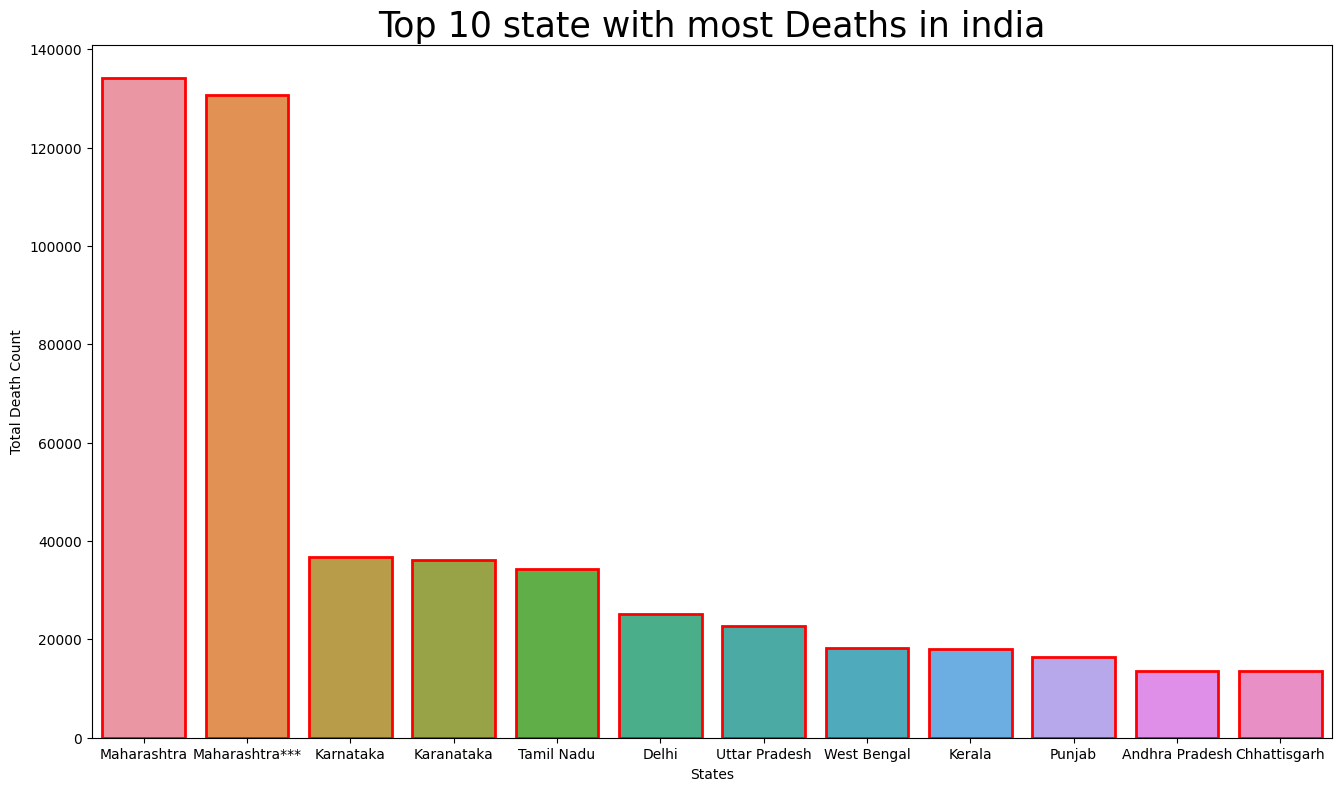

In [18]:
# Group by State/UnionTerritory, get the maximum active cases and corresponding date
top_10_Deaths = covid_df.groupby(by="State/UnionTerritory").max()[["Deaths", "Date"]].sort_values(by="Deaths", ascending=False).reset_index()



fig = plt.figure(figsize = (16,9))
plt.title("Top 10 state with most Deaths in india",size = 25)
ax = sns.barplot(data = top_10_Deaths.iloc[:12],y = "Deaths",x= "State/UnionTerritory",linewidth = 2,edgecolor = "red")
plt.xlabel("States")
plt.ylabel("Total Death Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Top 5 Affected cases in india')

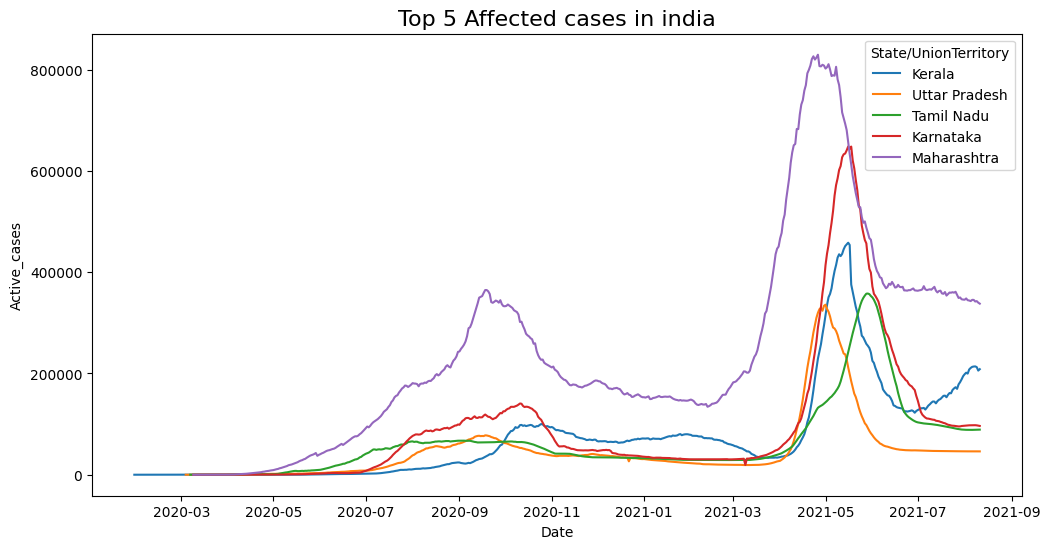

In [19]:
# Plot the growth trend of active cases for the top 5 affected states


fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = covid_df[covid_df["State/UnionTerritory"].isin(["Maharashtra", "Karnataka", "Kerala", "Tamil Nadu", "Uttar Pradesh"])],x = "Date",y = "Active_cases", hue = "State/UnionTerritory")

plt.title("Top 5 Affected cases in india",size = 16)




In [20]:
# Displaying the first few rows of the vaccine DataFrame
vac_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [21]:
# Renaming the column "Updated On" to "Vaccine_Date" in the vaccine DataFrame
vac_df.rename(columns  = {"Updated On" : "Vaccine_Date"},inplace = True)

In [22]:
# Displaying the first few rows of the vaccine DataFrame after renaming the column
vac_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [23]:
# Displaying information about the vaccine DataFrame, including column names, non-null counts, and data types
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [24]:
# Checking for missing values in the vaccine DataFrame
vac_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [25]:
# Dropping unnecessary columns from the vaccine DataFrame
vacc = vac_df.drop(columns = ["Sputnik V (Doses Administered)","AEFI","18-44 Years (Doses Administered)",'45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis = 1)

In [26]:
# Displaying the first few rows of the modified vaccine DataFrame
vacc.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


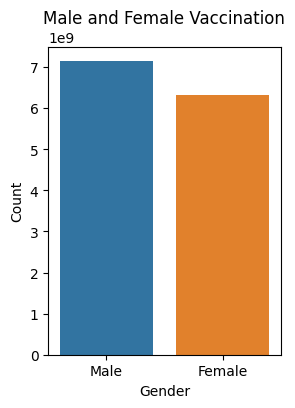

In [35]:
# Calculate the counts for males and females and Create a count plot
fig = plt.figure(figsize = (3,4))

male_count = vacc["Male(Individuals Vaccinated)"].sum()
female_count = vacc["Female(Individuals Vaccinated)"].sum()

data = {
    "Gender": ["Male", "Female"],
    "Count": [male_count, female_count]
}

sns.barplot(x="Gender", y="Count", data=data)
plt.title("Male and Female Vaccination")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [28]:
# Removing rows where the state is "India" from the vaccine DataFrame

vaccine = vac_df[vac_df.State!= "India"]
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Renaming the column "Total Individuals Vaccinated" to "Total" in the vaccine DataFrame
vaccine.rename(columns  = {"Total Individuals Vaccinated" : "Total"},inplace = True)
# Displaying the first few rows of the modified vaccine DataFrame after renaming the column
vaccine.head()

/tmp/ipykernel_33/962865242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns  = {"Total Individuals Vaccinated" : "Total"},inplace = True)


,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [30]:
# Finding the total vaccinated individuals for each state and selecting the top 5 vaccinated states


max_vac = vaccine.groupby("State")["Total"].sum().to_frame("Total")
max_vac = max_vac.sort_values("Total",ascending = False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


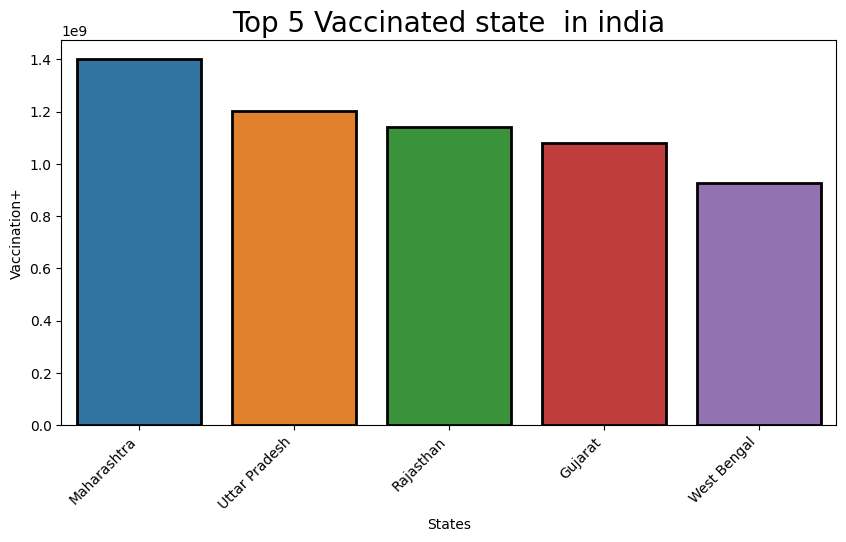

In [31]:
# Creating a bar plot to visualize the top 5 vaccinated states in India

fig = plt.figure(figsize = (10,5))
plt.title("Top 5 Vaccinated state  in india",size = 20)
x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total,x= max_vac.index,linewidth = 2,edgecolor = "black")
plt.xlabel("States")
plt.ylabel("Vaccination+")
plt.xticks(rotation = 45, ha = "right")
plt.show()

In [32]:
# Finding the total vaccinated individuals for each state and selecting the bottom 5 vaccinated states
min_vac = vaccine.groupby("State")["Total"].sum().to_frame("Total")
min_vac = min_vac.sort_values("Total",ascending = True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


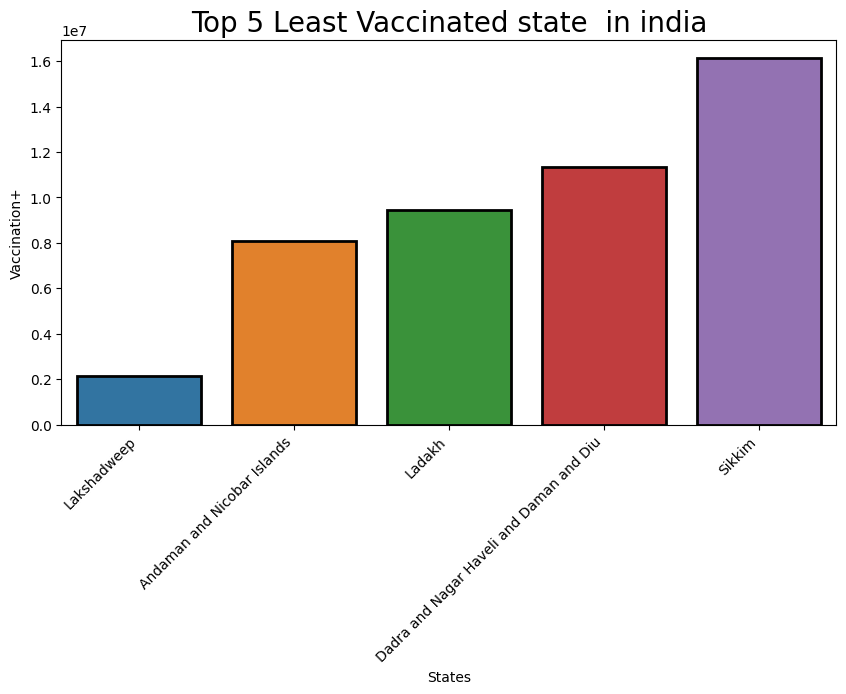

In [36]:
# Creating a bar plot to visualize the bottom 5 vaccinated states in India
fig = plt.figure(figsize = (10,5))
plt.title("Top 5 Least Vaccinated state  in india",size = 20)
x = sns.barplot(data = min_vac.iloc[:10],y = min_vac.Total,x= min_vac.index,linewidth = 2,edgecolor = "black")
plt.xlabel("States")
plt.ylabel("Vaccination+")
plt.xticks(rotation = 45, ha = "right")
plt.show()

